In [22]:
# Import libraries
import numpy as np
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier


In [23]:
# Loading data
data = yf.download("VALE3.SA",
                  start = "2015-01-01",
                  end = "2020-10-28")

[*********************100%***********************]  1 of 1 completed


In [24]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,21.700001,21.950001,21.059999,21.280001,14.682979,5658400
2015-01-05,20.760000,21.129999,20.510000,20.959999,14.462181,8603000
2015-01-06,21.070000,22.129999,21.070000,21.799999,15.041776,9879900
2015-01-07,22.320000,22.809999,21.969999,22.600000,15.593764,6130900
2015-01-08,22.770000,22.879999,22.110001,22.840000,15.759364,4667300
...,...,...,...,...,...,...
2020-10-21,61.650002,63.209999,61.599998,62.849998,53.426239,21480900
2020-10-22,63.110001,63.490002,62.439999,63.099998,53.638756,32097700
2020-10-23,62.619999,63.889999,62.220001,63.450001,53.936279,24263400


In [25]:
# Features construction

data["Open-Close"] = (data.Open - data.Close)/data.Open
data["High-Low"] = (data.High - data.Low)/data.Low
data["percent_change"] = data["Adj Close"].pct_change()
data["std_5"] = data["percent_change"].rolling(5).std()
data["ret_5"] = data["percent_change"].rolling(5).mean()
data.dropna(inplace=True)

# X is the input variable

x = data[["Open-Close", "High-Low", "std_5", "ret_5"]]

# Y is the target or output variable
y = np.where(data["Adj Close"].shift(-1) > data["Adj Close"],1,-1)

In [26]:
data

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,percent_change,std_5,ret_5
Date,,,,,,,,,,,
2015-01-09,22.590000,22.850000,22.290001,22.350000,15.421268,3577300,0.010624,0.025123,-0.021454,0.028433,0.010180
2015-01-12,22.110001,22.650000,21.930000,22.639999,15.621364,4735200,-0.023971,0.032832,0.012975,0.024742,0.015783
2015-01-13,22.700001,23.129999,22.510000,22.510000,15.531668,6096400,0.008370,0.027543,-0.005742,0.021806,0.006619
2015-01-14,21.799999,22.000000,20.690001,20.700001,14.282784,10902600,0.050459,0.063316,-0.080409,0.038172,-0.016802
2015-01-15,20.799999,21.260000,20.450001,20.940001,14.448382,5822800,-0.006731,0.039609,0.011594,0.038349,-0.016607
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,61.650002,63.209999,61.599998,62.849998,53.426239,21480900,-0.019465,0.026136,0.016332,0.009682,-0.000439
2020-10-22,63.110001,63.490002,62.439999,63.099998,53.638756,32097700,0.000158,0.016816,0.003978,0.008663,0.002039
2020-10-23,62.619999,63.889999,62.220001,63.450001,53.936279,24263400,-0.013255,0.026840,0.005547,0.008105,0.003884


In [31]:
# Total dataset length

dataset_length = data.shape[0]


# Trainig dataset length
split = int(dataset_length * 0.75)



In [32]:
# Splitiing the X and y into train and test datasets

x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1083, 4) (361, 4)
(1083,) (361,)


In [33]:
clf = RandomForestClassifier(random_state=5)

In [34]:
# Create the model on train dataset

model = clf.fit(x_train, y_train)

In [35]:
from sklearn.metrics import accuracy_score
print("Correct Prediction (%) ", accuracy_score(y_test, model.predict(x_test), normalize=True)*100.0)

Correct Prediction (%)  56.232686980609415


In [36]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(x_test))
print(report)

              precision    recall  f1-score   support

          -1       0.57      0.54      0.55       181
           1       0.56      0.58      0.57       180

    accuracy                           0.56       361
   macro avg       0.56      0.56      0.56       361
weighted avg       0.56      0.56      0.56       361



In [37]:
data["strategy_returns"] = data.percent_change.shift(-1)*model.predict(x)

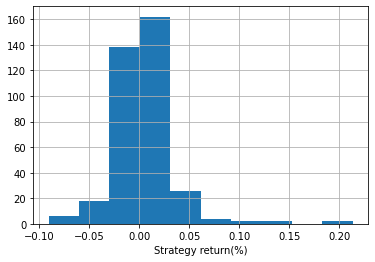

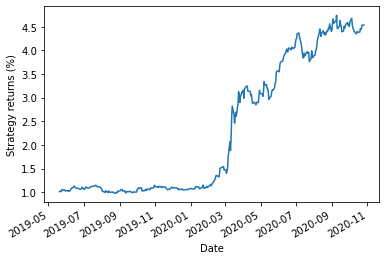

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
data.strategy_returns[split:].hist()
plt.xlabel("Strategy return(%)")
plt.show()

(data.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel("Strategy returns (%)")
plt.show()